In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans

# Task 1: Preparing Two DataSets:

In Task#1 We are required to prepare two datasets firstly a small-set of values that would enable us to apply k-means algorithm using pen and paper. Secondly a large dataset.

#### Small DataSet: 
`1 (4,4)`   `2 (5,5)` `3 (5,6)` `4 (6,8)` `5 (25,20)`    `6 (23,18)` `7 (27,22)`    `8 (25,22)`

#### Large DataSet:

In [ ]:
n_features=int(input("Please Enter the number of dimensions: ").strip())
n_samples=int(input("Please Enter the number of sample points: ").strip())
k=int(input("Please Enter the number of cluster: ").strip())

Please Enter the number of dimensions: 2
Please Enter the number of sample points: 500
Please Enter the number of cluster: 3


In [ ]:
# Creating the large data set using sklearn library
data, _ = make_blobs(n_samples=n_samples, centers=k, n_features=n_features, random_state=20)

### Justification for selection:
* The small dataset consists of 8 data points, this allows for easy calculations furthermore the points are selected in a way so its easier to form two distinct clusters, The large dataset is suitable since it has 500 points with three distinct clusters `make_blobs` from sklearn library has been used to aid formation of clusters.

# Task 2: Applying K-Means On Paper

# Task 3: Create a Test Harness:

In [ ]:
def run_unit_tests():
#** The Function to help unit test the K-Means Algorithm**    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    
    test_cluster = kmeans.cluster_centers_
    test_cluster.sort(axis=0)
    
    cluster=k_means(k,data)
    cluster.sort(axis=0)
    
    assert((cluster.round(2)==test_cluster.round(2)).all)
    print("The test has been successfully passed")

#### Justification:

The unit test has been designed to check if the cluster centers produced by sklearn kmeans are exactly equal to clustering labels produced by our own algorithm, the values have been rounded down to 2 decimal places, additionally the coverage of testing does not include checking the labels of each data point of a cluster.

# Task 4: Implementing K-Means Clustering in Python:

In this task we are going to implement the K-means clustering algorithm in python

In [ ]:
# We will have to transform the data based on the dimensions if the dimension is greater then 2
# Then we will use the Principal component analysis method to reduce the dimensions to 2
# Lets Transform the data
if n_features >2 :
    pca = PCA(2)
    data = pca.fit_transform(data)
else:
    pass

In [ ]:

# **Function to compute random numbers as initial centroids of a cluster**
def initial_centroids(k, X):    
    array = []
    for i in range(k): # For each cluster an initial random centroid will be picked using numpy's function
        c_x1 = np.random.uniform(min(X[:,0]), max(X[:,0])) # Centroid one for x-axis
        c_x2 = np.random.uniform(min(X[:,1]), max(X[:,1])) # Centroid two for y-axis
        array.append([c_x1, c_x2])
    return np.asarray(array)

# **Function to calculate the eucledian distance between two points:**
def dist(a, b):    
    return np.sqrt(sum(np.square(a-b)))

In [ ]:

# **Function to assign cluster label to each data point of dataset:**
def cluster_assigment(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)): # Looping over each point in our data set 
        distance_array = []       # Empty array to store distance values
        for j in range(k):  # Looping over each cluster and calculating the distance b/w 1 pt and centroid
            distance_array.append(dist(X[i], cg[j]))
        indx = np.argmin(distance_array) # The distance with minimum distance stored as an index
        cluster[i] = indx # Final clusters with labels
    return np.asarray(cluster)


# **Function to compute the new position of centroid**
def compute_centroids(k, X, cluster):
    
    cg_arr = [] # Empty array to store final centroids
    for i in range(k): # Looping through one cluster at a time
        arr = [] # Empty array to store data points of one cluster
        for j in range(len(X)): # Looping through each data point
            if cluster[j]==i: 
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0)) # Mean value is the centroid of given cluster
    return np.asarray(cg_arr)

# **Function to calculate the change in centroid value**
def centroid_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res
# **Function to store centroid value for comparision** 
def storecg_val(cg_prev):
    x=cg_prev
    return np.asarray(x)

# Optional Task: Visualization of Final Clusters:

In [ ]:
def display_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green',3:'purple',4:'red'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_Position')
    plt.ylabel('Y_Position')
    plt.show()

#### *Task 4 Continued:*

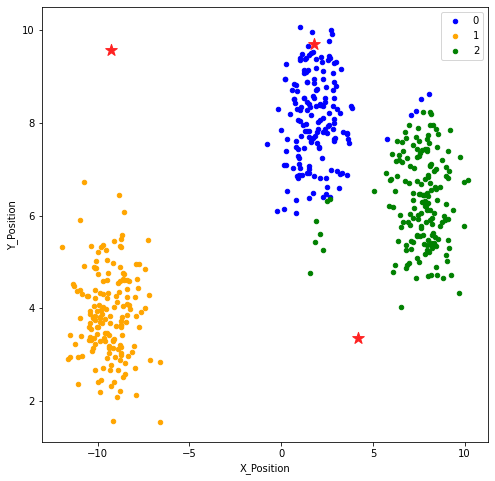

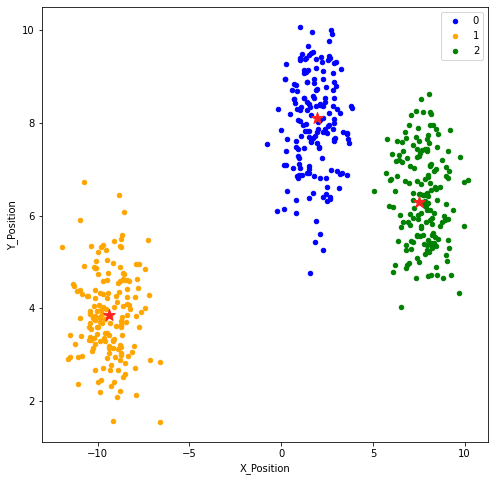

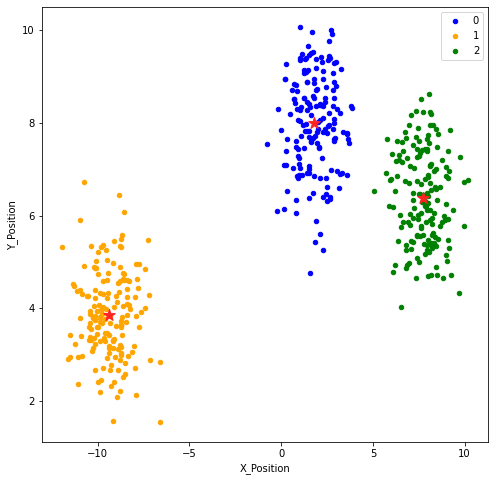

In [ ]:
# ** creating a function to apply the kmeans algorithm**
def k_means(k, X):
    cg_prev = initial_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001: # Once the change in centroid value is small calculation ends
        cluster = cluster_assigment(k, X, cg_prev)
        display_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = centroid_change(cg_new, cg_prev)
        cg_prev = cg_new
    
    return storecg_val(cg_prev)
    return cluster

cluster= k_means(k, data)

#### Limitations & Assumptions of Implementation: (10 Points)

* The biggest limitation to our implementation is the in the first step which is the random initialisation of centroids for clusters, this random initilisation can result in the initial centroids being two close and as a result incorrect clusters would be formed i.e for 3 clusters one blob would be divided into two clusters.


* Secondly the limitation to our algorithm is user has to specify the k-value to be used i.e the number of clusters to formed are required rather than computing the appropriate number of clusters automatically for given data input from the user is required.


* Thirdly the algorithm uses something called PCA i.e principal component analysis this is used to reduce the dimensionality of data to 2 dimensions only therefore the algorithm works with arbitary number of dimensions but reducing them to 2D only. 

#### Description of complexity of algorithm: (10 points)
* The Complexity of algorithm can be mainly associated with two components of program namely space and time, for our algorithm the time of complexity will predominantly be dependent on the number of data points used for kmeans clustering, since the greater the points we have more number of calculations will have to be performed.

* Furthemore we have used while loop for centroid change as 0.001, if we change this value by increasing it this would increase the overall time complexity of the algorithm, 

* Finally the number of steps for algorithm will be shorter if a good random value is picked for the initial centroids.

## Results of unit-tests:

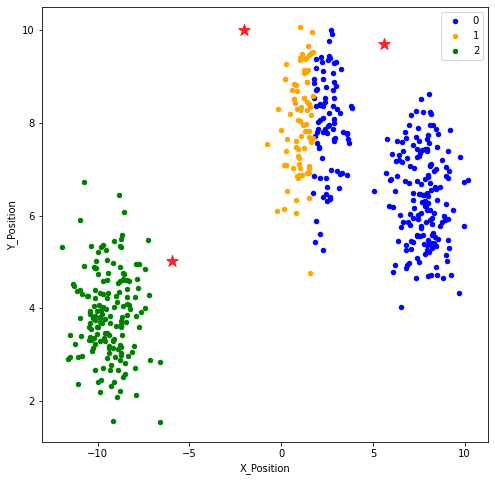

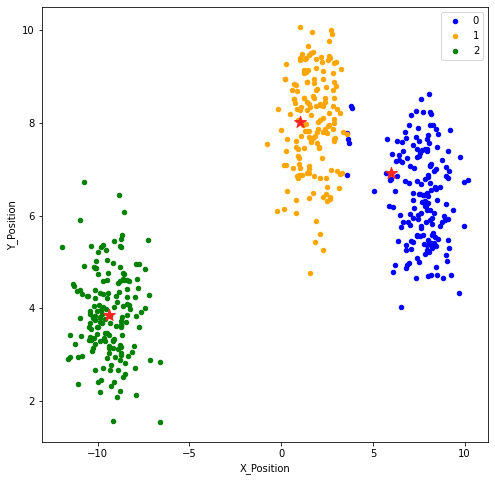

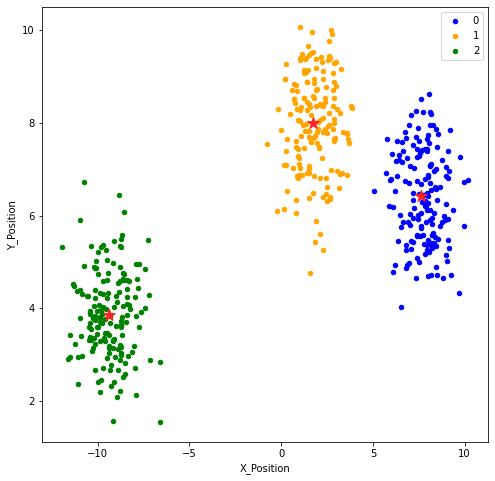

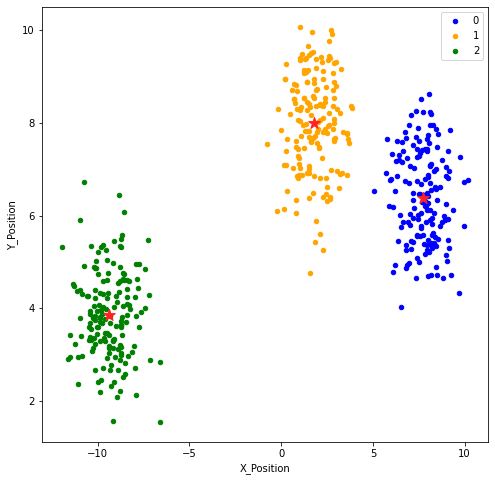

The test has been successfully passed


In [ ]:
run_unit_tests()